<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/SVM_classic_qc_Ana_Alonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio "binary-classification" para saber si una persona realizará o no un fraude a un banco clase 0 No comete fraude y clase 1 comete fraude.

Importación e instalación de librerías a usar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install qiskit
!pip install qiskit-machine-learning
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel

  Using cached qiskit-0.44.2-py3-none-any.whl (8.2 kB)
  Using cached qiskit_terra-0.25.2.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.2 MB)
  Using cached rustworkx-0.13.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
  Using cached stevedore-5.1.0-py3-none-any.whl (49 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.6 MB/s eta 0:00:00
  Using cached qiskit_machine_learning-0.6.1-py3-none-any.whl (148 kB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512381 sha256=eb7525c6f9181757d65afbc3ea6efc598cf0ec51b1ba429038a0eea07517b7b8
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910

Descarga del dataset 'creditcard' y estudio de las variables.

In [4]:
df_original = pd.read_csv("creditcard.csv", encoding='latin-1', sep=',', error_bad_lines=False)

df_original

<ipython-input-4-69e2572e9a92>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_original = pd.read_csv("creditcard.csv", encoding='latin-1', sep=',', error_bad_lines=False)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df_nona = df_original.dropna()
df_nona.shape

(284807, 31)

In [6]:
df_nona.groupby("class").count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


Observamos que hay muchos más registros de clase cero que de clase 1, por lo que modificaremos el dataset a usar, tomando todos los registros de clase 1 y solo 800 de clase 0.

Mezclamos los registros para que no aparezcan las clases que son iguales todas seguidas.

In [7]:
df_class1 = df_nona.loc[df_nona["class"] == 1.0]
df_class0 = df_nona.loc[df_nona["class"] == 0.0]
df_class0 = df_class0[0:800]
df = pd.concat([df_class1, df_class0], axis=0)

df = df.sample(frac=1).reset_index(drop=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,100924.0,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,...,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1.00,1
1,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
2,44.0,-0.899992,0.136255,1.883665,-0.208996,1.051441,1.905241,0.241423,0.647631,-0.053466,...,-0.081500,-0.016926,-0.147706,-1.384620,-0.024352,0.412659,-0.106776,-0.190476,21.55,0
3,53658.0,-1.739341,1.344521,-0.534379,3.195291,-0.416196,-1.261961,-2.340991,0.713004,-1.416265,...,0.383180,-0.213952,-0.336640,0.237076,0.246003,-0.044228,0.510729,0.220952,0.00,1
4,149640.0,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,...,0.397058,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,2.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,206.0,-1.499761,1.059588,0.496912,1.006069,-0.672949,-0.490299,1.102433,-0.084854,-0.599233,...,0.082710,0.610348,0.257934,0.426521,-0.145909,-0.348520,-0.215146,-0.027602,153.91,0
1288,109297.0,0.745153,2.809299,-5.825406,5.835566,0.512320,-0.615622,-2.916576,0.776710,-1.878832,...,0.284841,-0.874383,-0.083995,-0.651442,0.454594,0.050376,0.756953,0.383869,0.00,1
1289,102671.0,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,-3.875643,...,1.189423,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886,0.00,1
1290,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52,1


Saco la matriz de correlación para estudiar qué variables explican mejor la clase binaria para quedarme solo con esas columnas.

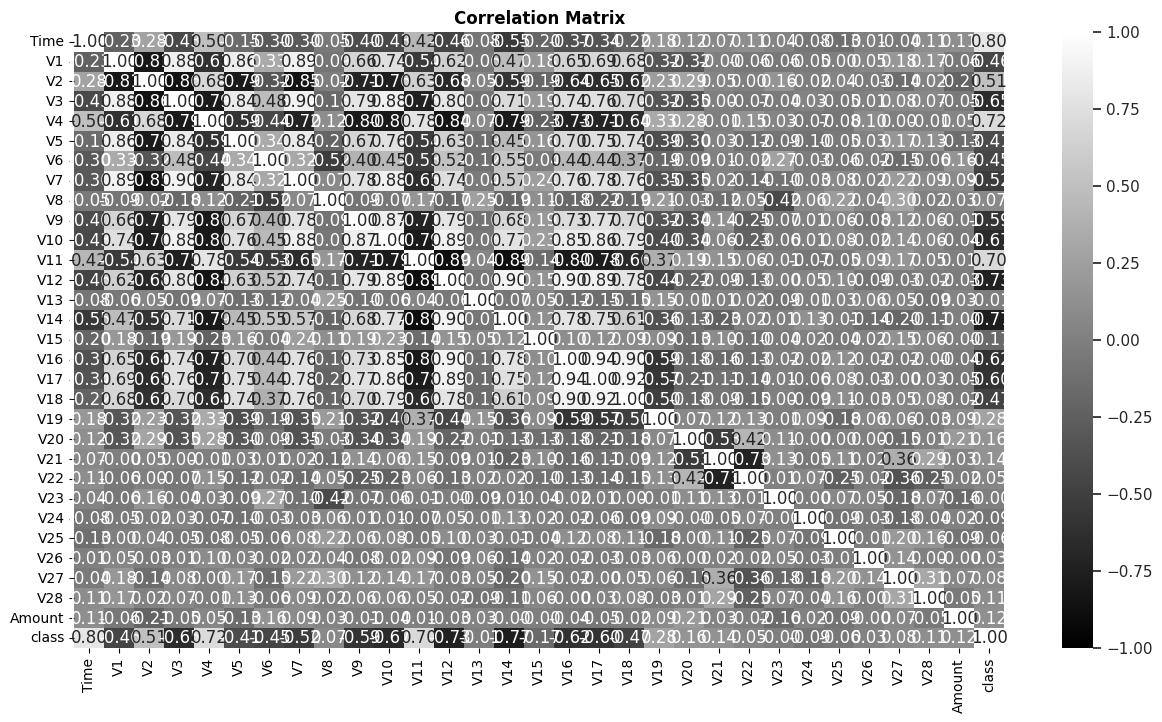

In [8]:
cor_mtx = df.corr()
df_corr = pd.DataFrame(cor_mtx)
fig, ax = plt.subplots(figsize=(15, 8))
sbn.set(style="white", palette="gray")
sbn.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='gray', fmt=".2f");
ax.set_title('Correlation Matrix', weight='bold')
plt.show()

Observamos que las más correlacionadas son las primeras Time, V2, V3, V6, V7, V9, V10, V11, V16 y V17.

A continuación, elimino el resto de columnas.

In [9]:
df_to_use = df.drop(columns=['V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'])

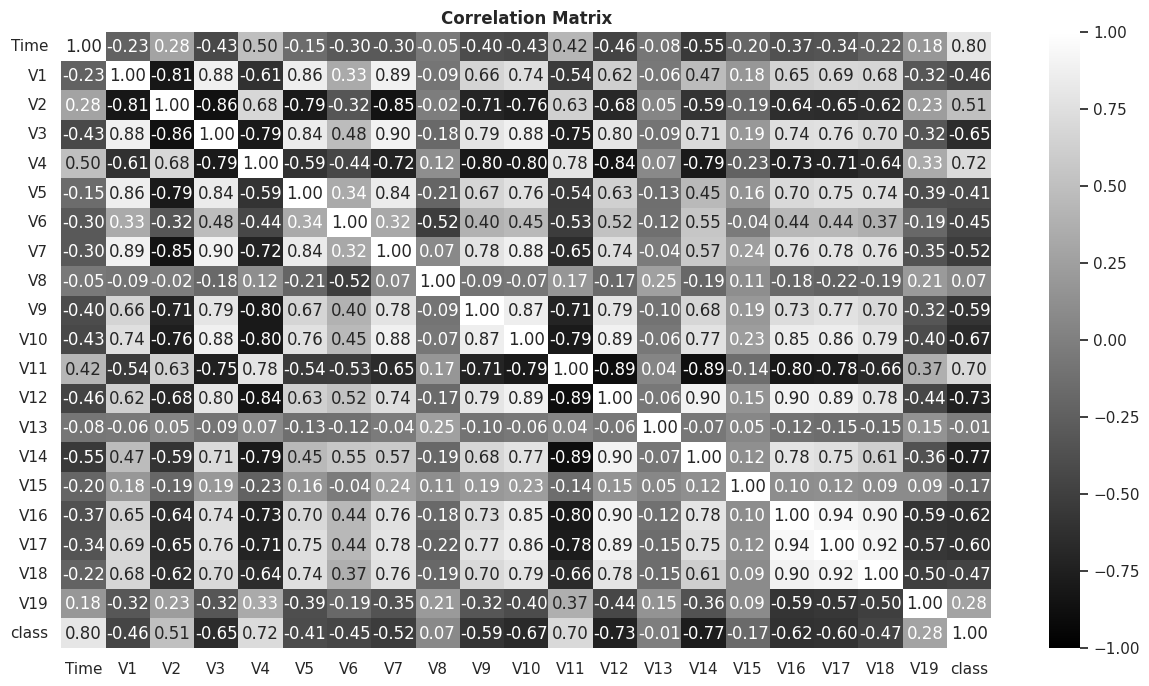

In [10]:
cor_mtx = df_to_use.corr()
df_corr = pd.DataFrame(cor_mtx)
fig, ax = plt.subplots(figsize=(15, 8))
sbn.set(style="white", palette="gray")
sbn.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='gray', fmt=".2f");
ax.set_title('Correlation Matrix', weight='bold')
plt.show()

Ahora sí, tenemos un dataset de 1292 registros más o menos equilibrados. Y solo con las variables más explicativas.

Saco un diagrama de barras para ver la correlación de las variables escogidas frente a la variable objetivo, la clase.

In [11]:
df_corr.iloc[:20, 20]

Time    0.798139
V1     -0.460331
V2      0.507464
V3     -0.652225
V4      0.715379
V5     -0.406164
V6     -0.451174
V7     -0.524103
V8      0.071808
V9     -0.590889
V10    -0.665886
V11     0.701573
V12    -0.734579
V13    -0.008311
V14    -0.770151
V15    -0.169310
V16    -0.617029
V17    -0.596022
V18    -0.469251
V19     0.278452
Name: class, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

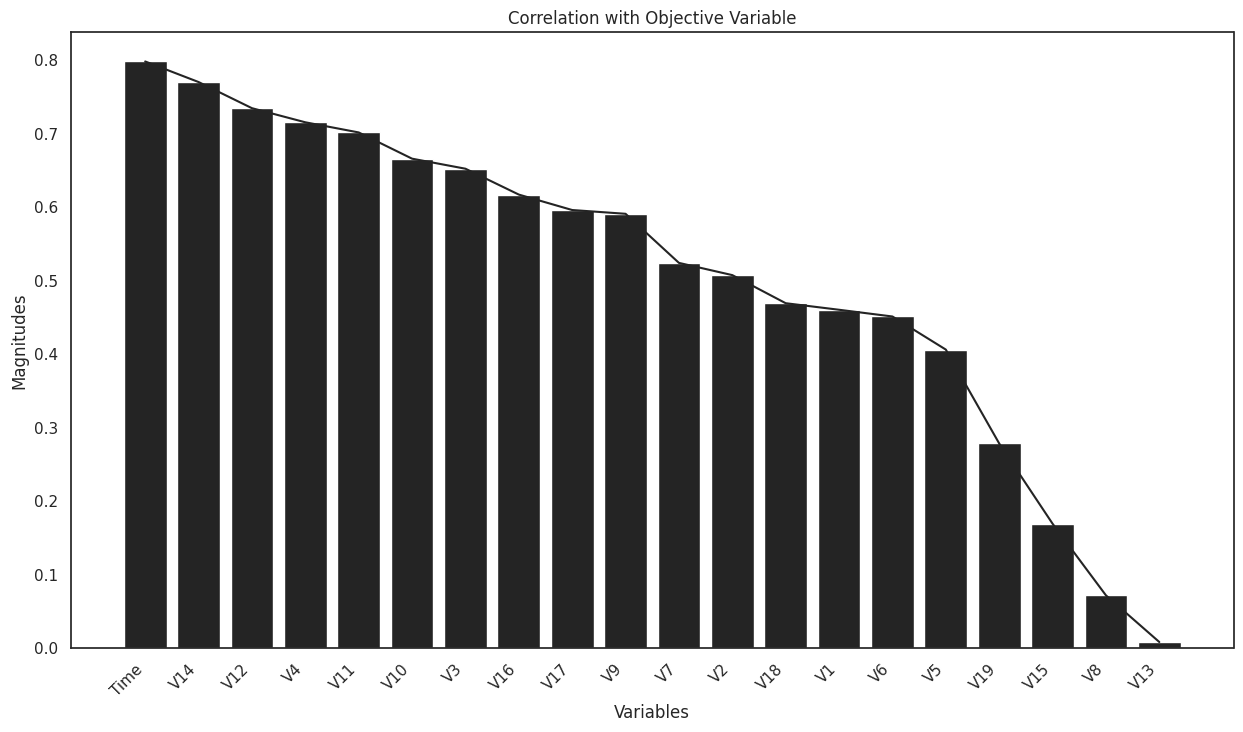

In [12]:
plt.figure(figsize=(15, 8))
plt.bar(df_corr.iloc[:20,20].abs().sort_values(ascending=False).index, df_corr.iloc[:20,20].abs().sort_values(ascending=False).values)
plt.plot(df_corr.iloc[:20,20].abs().sort_values(ascending=False).index, df_corr.iloc[:20,20].abs().sort_values(ascending=False).values)
plt.xlabel('Variables')
plt.ylabel('Magnitudes')
plt.title('Correlation with Objective Variable')
plt.xticks(rotation=45, ha='right')
plt.show

Se eliminan las variables con menor correlación con la variable objetivo.

La clase será predicha con las 6 variables que mejor la explican.

In [13]:
df_final = df_to_use.drop(columns=['V13','V8','V15','V19','V5','V6','V1','V18','V2','V7','V9','V17'])

df_final

,Time,V3,V4,V10,V11,V12,V14,V16,class
0,100924.0,-22.209875,9.584969,-19.836149,3.223233,-10.895134,0.116303,-7.606425,1
1,166831.0,-1.135194,1.086963,1.334414,1.032016,-0.722023,0.334119,-0.429392,1
2,44.0,1.883665,-0.208996,-0.504171,1.254599,-0.236629,0.384574,-1.370563,0
3,53658.0,-0.534379,3.195291,-2.996669,0.747478,-4.596612,-4.757074,-2.535494,1
4,149640.0,-5.137274,3.818392,-3.263007,3.592797,-2.772349,-6.281094,-2.679171,1
...,...,...,...,...,...,...,...,...,...
1287,206.0,0.496912,1.006069,-0.072664,-0.527734,0.193356,0.369248,-0.145021,0
1288,109297.0,-5.825406,5.835566,-4.546936,4.698795,-8.507786,-7.628710,-2.558669,1
1289,102671.0,-9.111326,8.431986,-6.868509,7.150625,-10.262984,-10.127525,-5.190271,1
1290,56650.0,-7.682767,6.991214,-7.864506,4.774148,-8.245898,-7.974251,-7.244340,1


Tenemos un dataset con tal solo 8 variables explicativas (de 31 que había inicialmente).

Creo 2 dataframes, el primero para SVM y el segundo para el QSVM.

Escalo los datos entre 0 y 1 para el SVM, y entre 0 y 2*pi para el QSVM.

In [15]:
# Extraer la columna con la clase binaria
binary_column = pd.DataFrame(df_final.iloc[:, -1])

# Escalar los datos en el rango [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_final.iloc[:, :-1])

# Escalar los datos en el rango [0, 2*pi]
scaler2 = MinMaxScaler(feature_range=(0, 2*np.pi))
scaled_data2 = scaler.fit_transform(df_final.iloc[:, :-1])


# Crear nuevo DataFrame con datos escalados y la columna binaria sin cambios
datos_CC = pd.DataFrame(scaled_data, columns=df_final.columns[:-1])
datos_CC.insert(0, df_final.columns[-1], binary_column)
datos_CC = datos_CC.dropna()

datos_QC = pd.DataFrame(scaled_data2, columns=df_final.columns[:-1])
datos_QC.insert(0, df_final.columns[-1], binary_column)
datos_QC = datos_QC.dropna()

# SVM clásico

Divido los datos en las categorías entrenamiento, validación y test.

In [16]:
X_aux, X_test, y_aux, y_test = train_test_split(
    datos_CC.iloc[:,1:], datos_CC.iloc[:,0], test_size=0.15, shuffle=True)
X_aux.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_aux.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_aux, y_aux, test_size=0.2, shuffle=True)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [17]:
m = SVC(kernel = 'rbf', gamma=0.01, C=10)

In [18]:
m.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

Predicciones con el conjunto de validación para poder reajustar los parámetros.

In [19]:
predicciones = m.predict(X_val)

# Se evalúa el modelo utilizando métricas como la precisión (accuracy) y un informe de clasificación
precision = accuracy_score(y_val, predicciones)
inf_classification = classification_report(y_val, predicciones)

print("Model Accuracy:", precision)
print("\nInformation of the Classification:\n", inf_classification)

Model Accuracy: 0.9863636363636363

Information of the Classification:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       136
           1       1.00      0.96      0.98        84

    accuracy                           0.99       220
   macro avg       0.99      0.98      0.99       220
weighted avg       0.99      0.99      0.99       220



Una vez elegido el mejor Kernel y los mejores parámetros, se prueba con los datos de test.

In [20]:
pred = m.predict(X_test)

# Evaluación del modelo utilizando la precisión e informe de clasificación
precision = accuracy_score(y_test, pred)
inf_classification = classification_report(y_test, pred)

print("Model Accuracy:", precision)
print("\nInformation of the Classification:\n", inf_classification)

Model Accuracy: 0.979381443298969

Information of the Classification:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       112
           1       1.00      0.95      0.97        82

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



Obtengo una precisión del modelo muy alta, tanto a la hora de la validación como a la hora de utilizar los datos de test.

# QSVM

Nuevamente, divido los datos en las categorías entrenamiento, validación y test.

In [44]:
X_aux, X_test, y_aux, y_test = train_test_split(
    datos_QC.iloc[:,1:], datos_QC.iloc[:,0], test_size=0.15, shuffle=True)
X_aux.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_aux.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_aux, y_aux, test_size=0.9, shuffle=True)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Hago el 'Feature map' y el 'kernel'.

In [22]:
f,c = X_train.shape
feature_map = ZZFeatureMap(feature_dimension=c, reps=2, entanglement="linear")
kernel = FidelityQuantumKernel(feature_map=feature_map)

In [24]:
m2 = SVC(kernel = kernel.evaluate)

In [45]:
m2.fit(X_train, y_train)

SVC(kernel=<bound method FidelityQuantumKernel.evaluate of <qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x791374b226e0>>)

Se realizan predicciones en el conjunto de validación para ajustar parámetros.

In [ ]:
pred2 = m2.predict(X_val)

# Se evalúa de precisión (accuracy) e informe de clasificación
precision2 = accuracy_score(y_val, pred2)
inf_calssification2 = classification_report(y_val, pred2)

print("Model Accurary:", precision2)
print("\nInformation of the Classification:\n", inf_classification2)

Una vez elegido el mejor Kernel y los mejores parámetros, se prueba con los datos de test.

In [ ]:
pred2 = m2.predict(X_test)

# Evaluación de precisióne informe de clasificación test
precision2 = accuracy_score(y_test, pred2)
inf_classification2 = classification_report(y_test, pred2)

print("Model Accuracy:", precision2)
print("\nInformation of the Classification:\n", inf_classification2)

Precisión del modelo: 0.8108108108108109

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        60
         1.0       0.00      0.00      0.00        14

    accuracy                           0.81        74
   macro avg       0.41      0.50      0.45        74
weighted avg       0.66      0.81      0.73        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se exportan los 2 modelos.

In [ ]:
import joblib
joblib.dump(m, 'mCC.pkl')
joblib.dump(m2, 'mQC.pkl')

['mQC.pkl']

Se puede observar con los datos de test que los modelos tienen una precisión y error similares, siendo algo mejor el clásico.

Hay fallos a la hora de computar debido al gran número de datos.

Se confirma que los modelos cuánticos actualmente pueden ser útiles contando con una población pequeña de entrenamiento, pero con grandes poblaciones de entrenamiento,es mejor opción hacer uso de un modelo clásico.

A continuación, se muestran las matrices de confusión. Para ver cómo funciona cada modelo, es decir, si fallan de manera similar o no.

In [ ]:
# Calcular las matrices de confusión
matriz_confusionCC = confusion_matrix(y_test, pred)
matriz_confusionQC = confusion_matrix(y_test, pred2)

# Se convierten en dataframes
df_confusionCC = pd.DataFrame(matriz_confusionCC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])
df_confusionQC = pd.DataFrame(matriz_confusionQC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])

In [ ]:
df_confusionCC.head()

,Predicción positivos,Predicción negativos
Real positivos,60,0
Real negativos,14,0


In [ ]:
df_confusionQC.head()

,Predicción positivos,Predicción negativos
Real positivos,60,0
Real negativos,14,0


Se observa que en ambos casos todos los negativos reales están bien clasificados, opuestamente, se han predicho positivos que realmente eran negativos. Esto, se puede achacar a que no hay un gran número de datos de entrenamiento.

Aun así, para estos datos, es mejor utilizar el SVM Clásico.

Se realiza la comprobación de esto a continuación.

In [ ]:
# Calcular las matriz de confusión
matriz_confusionCC = confusion_matrix(y_test, pred)

# Transformación a dataframe
df_confusionCC = pd.DataFrame(matriz_confusionCC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])

In [ ]:
df_confusionCC.head()

,Predicción positivos,Predicción negativos
Real positivos,32745,0
Real negativos,5307,0


In [ ]:
joblib.dump(m, 'mCC_final.pkl')

['mCC_final.pkl']

In [ ]:
# Contar los valores en la columna binaria
val_count = df_final['class'].value_counts()

# Imprimir el recuento
print(val_count)

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64


Esta situación se da debido a que hay un mayor número de registros de gente que NO realiza fraude que de los que sí lo hacen.

# Modelo balanceados

Modelo que va a "jugar" con los pesos en relación a las clases, es decir, dará distintos pesos a cada una de las dos clases.

In [ ]:
from sklearn.utils import class_weight

# Calculo pesos de clase para manejar las clases desequilibradas
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Clasificador SVM con kernel RBF y parámetros gamma=0.01 y C=10, y los pesos de clase
m = SVC(kernel='rbf', gamma=0.01, C=10, class_weight=dict(enumerate(class_weights)))

# Entrena el modelo con los datos de entrenamiento
m.fit(X_train, y_train)

SVC(C=10, class_weight={0: 0.5809288266007144, 1: 3.5891341256366722},
    gamma=0.01)

In [ ]:
pred = m.predict(X_test)

# Evaluación de la precisión e informe de clasificación
precision = accuracy_score(y_test, pred)
inf_classification = classification_report(y_test, pred)

print("Model Accuracy:", precision)
print("\nInformation of the classification:\n", inf_classification)

Precisión del modelo: 0.6780195521917376

Informe de Clasificación:
               precision    recall  f1-score   support

         0.0       0.96      0.66      0.78     32745
         1.0       0.28      0.81      0.41      5307

    accuracy                           0.68     38052
   macro avg       0.62      0.74      0.60     38052
weighted avg       0.86      0.68      0.73     38052



In [ ]:
# Calcular las matriz de confusión
matriz_confusionCC = confusion_matrix(y_test, pred)

# Se convierte en dataframe
df_confusionCC = pd.DataFrame(matriz_confusionCC, index=['Real negativos', 'Real positivos'], columns=['Predicción negativos', 'Predicción positivos'])

In [ ]:
df_confusionCC.head()

,Predicción negativos,Predicción positivos
Real negativos,21476,11269
Real positivos,983,4324


In [ ]:
joblib.dump(m, 'mCC_balanceado.pkl')

['mCC_balanceado.pkl']

Ahora disminuye la precisión pero el error es más parecido entre las 2 clases.